# Machine Learning Project Life Cycle with Iris Dataset

## Problem Statement

#### To predict the species of an iris flower

In [1]:
## Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## Data Gathering

In [2]:
# Dataset Import

iris = pd.read_csv("D:\\Piyanalytics\\Blog3\\Iris.csv") ## Write the path of the folder containing the "iris.csv" dataset

In [3]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# Dataset Details
print(iris.shape)

(150, 6)


In [5]:
iris  = iris.drop('Id', axis=1)
print(iris.shape)


(150, 5)


In [6]:
list(iris.columns)

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

## Data Pre-processing

In [7]:
# Missing Value Analysis

iris.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
# Any Missing Values
iris.isnull().values.any()

False

In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
# Checking datatype

iris.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [11]:
# Checking Duplicate Records

has_duplicate  = iris.duplicated()
duplicates = iris[has_duplicate]
print(duplicates)

print("Total duplicated records are:")
print(has_duplicate.sum())

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
34             4.9           3.1            1.5           0.1     Iris-setosa
37             4.9           3.1            1.5           0.1     Iris-setosa
142            5.8           2.7            5.1           1.9  Iris-virginica
Total duplicated records are:
3


In [12]:
# Droping Duplicate records

iris.drop_duplicates(subset=None, keep= 'first',inplace=True)

In [13]:
has_duplicate  = iris.duplicated()
duplicates = iris[has_duplicate]
print(duplicates)

print("Total duplicated records are:")
print(has_duplicate.sum())

Empty DataFrame
Columns: [SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: []
Total duplicated records are:
0


#### There are no duplicate values in iris dataset so can be used for further enealysis

## Exploratory Data Analysis

####  Data Summary

In [14]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Visualization/ Graphical Representation

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64


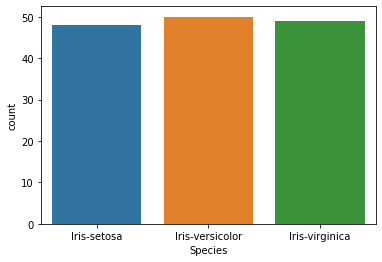

In [15]:
# For Species

sns.countplot("Species", data=iris)
print(iris.Species.value_counts())

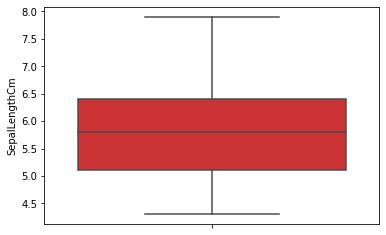

In [16]:
# For Sepal Length4

sns.boxplot(iris.SepalLengthCm,palette="Set1",orient= "v")

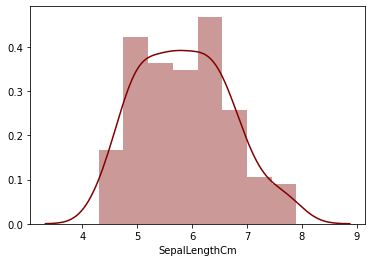

In [17]:
sns.distplot(iris.SepalLengthCm, color="maroon")

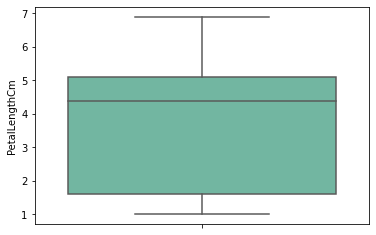

In [18]:
# For Petal Length

sns.boxplot(iris.PetalLengthCm,palette="Set2", orient="v")

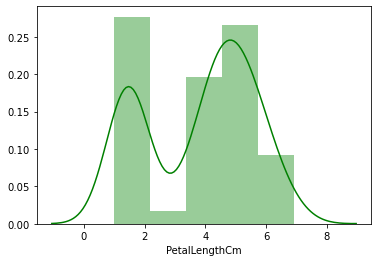

In [19]:
sns.distplot(iris.PetalLengthCm, color="green")

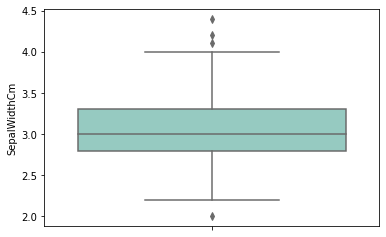

In [20]:
# For Sepal Width
sns.boxplot(iris.SepalWidthCm,palette = "Set3",orient="v")

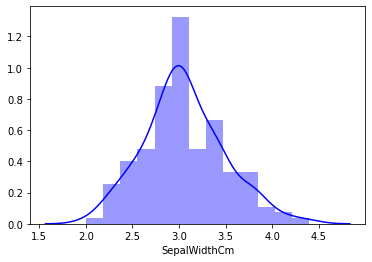

In [21]:
sns.distplot(iris.SepalWidthCm, color="blue")

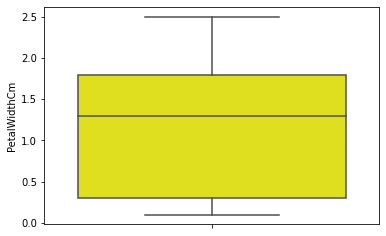

In [22]:
# For Petal width
sns.boxplot(iris.PetalWidthCm,color="yellow",orient="v")

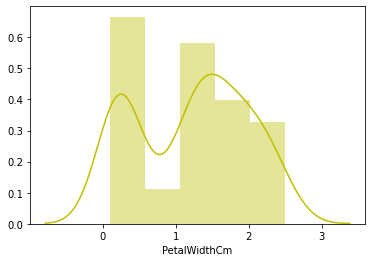

In [23]:
sns.distplot(iris.PetalWidthCm, color="y")

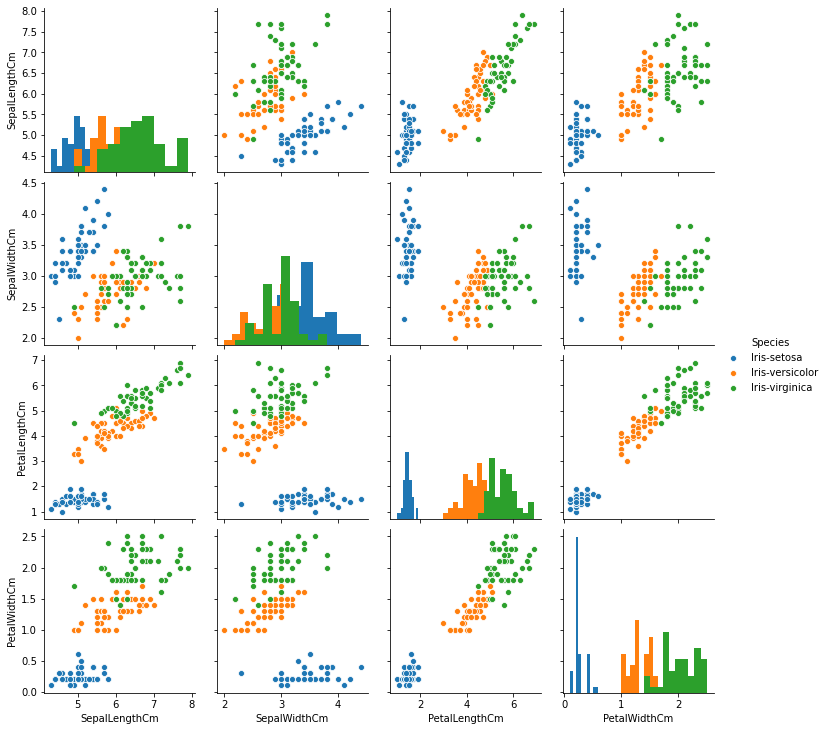

In [24]:

sns.pairplot(iris,  hue='Species', diag_kind="hist")

#### Data Partitioning

In [25]:
import sklearn as sk

from sklearn.model_selection import train_test_split


In [26]:
X = iris.drop("Species", axis=1)
X.shape

(147, 4)

In [27]:
y=  iris.loc[:,"Species"]
y.shape

(147,)

In [28]:
X_train,X_test,y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=42)

In [29]:
X_train.shape, X_test.shape,  y_train.shape, y_test.shape

((102, 4), (45, 4), (102,), (45,))

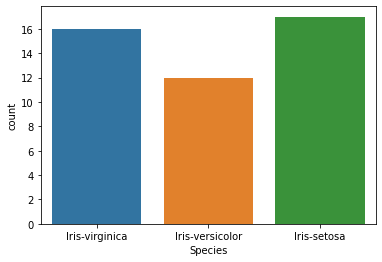

In [30]:
sns.countplot(y_test)

## Model Building

#### 1. Support Vector Machine

In [32]:
from sklearn.svm import SVC

iris_svm_model = SVC(kernel="linear",random_state=20)
iris_svm_model.fit(X_train,y_train)

SVC(kernel='linear', random_state=20)

In [33]:
from sklearn.metrics import accuracy_score
train_pred = iris_svm_model.predict(X_train)

# Train Accuracy
train_acc_svm = accuracy_score(y_train,train_pred)

test_pred = iris_svm_model.predict(X_test)
# Test Accuracy
test_acc_svm = accuracy_score(y_test,test_pred)

train_acc_svm, test_acc_svm

(1.0, 0.9777777777777777)

#### 2. K-Nearest Neighbour

In [35]:
from sklearn.neighbors import KNeighborsClassifier

iris_knn_model = KNeighborsClassifier(n_neighbors=3)
iris_knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [36]:
train_pred = iris_knn_model.predict(X_train)

# Train Accuracy
train_acc_knn = accuracy_score(y_train,train_pred)

test_pred = iris_knn_model.predict(X_test)
# Test Accuracy
test_acc_knn = accuracy_score(y_test,test_pred)

train_acc_knn, test_acc_knn

(0.9803921568627451, 0.9555555555555556)

#### 3. Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

iris_dt_model = RandomForestClassifier(n_estimators=500)
iris_dt_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [39]:
train_pred = iris_dt_model.predict(X_train)

# Train Accuracy
train_acc_rf = accuracy_score(y_train,train_pred)

test_pred = iris_dt_model.predict(X_test)
# Test Accuracy
test_acc_rf = accuracy_score(y_test,test_pred)

train_acc_rf, test_acc_rf

(1.0, 0.9555555555555556)

## Model Evaluation

In [43]:
Model_eval = {"Model":pd.Series(["SVM","KNN","Random Forest"]),
              "Train Accuracy":pd.Series([train_acc_svm,train_acc_knn,train_acc_rf]),
             "Test Accuarcy": pd.Series([test_acc_svm,test_acc_knn,test_acc_rf])}
Model_results = pd.DataFrame(Model_eval)
Model_results

,Model,Train Accuracy,Test Accuarcy
0,SVM,1.000000,0.977778
1,KNN,0.980392,0.955556
2,Random Forest,1.000000,0.955556


## Prediction

In [55]:
predicted_output =  iris_svm_model.predict([[5.4,3.9,1.7,0.4]])
predicted_output[0]

'Iris-setosa'